<a href="https://colab.research.google.com/github/RedPandaStyle/ACE-DATA201/blob/main/JPV_DATA102_PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Option 1 - Public Health Data***

Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns

Import

In [ ]:
phd = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv")
phd

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


All Column names for reference


In [ ]:
phdcol = phd.columns
print(*phd, sep = '\n')

encounter_id
patient_nbr
race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmitted


Data Types

In [ ]:
phd.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Now... What questions to ask?

What patterns emerge when filtering by:

1.   Age
2.   Gender
3.   Weight
4.   Race

Can we make any correlations between these and

- number of procedures, medications, admits,
- Diagnoses (1,2,3)
- A1C results, insulin
- Change, Readmits


So, drop some columns first to lighten the load. first try to find duplicates, 





In [ ]:
phd1= phd.drop(['max_glu_serum',
'metformin',
'repaglinide',
'nateglinide',
'chlorpropamide',
'glimepiride',
'acetohexamide',
'glipizide',
'glyburide',
'tolbutamide',
'pioglitazone',
'rosiglitazone',
'acarbose',
'miglitol',
'troglitazone',
'tolazamide',
'examide',
'citoglipton',
'glyburide-metformin',
'glipizide-metformin',
'glimepiride-pioglitazone',
'metformin-rosiglitazone',
'metformin-pioglitazone',
'change'], axis=1)
phd1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,insulin,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,0,0,250.83,?,?,1,None,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,0,0,276,250.01,255,9,None,Up,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,0,1,648,250,V27,6,None,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,0,0,8,250.43,403,7,None,Up,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,0,0,197,157,250,5,None,Steady,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,0,0,250.13,291,458,9,>8,Down,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,0,1,560,276,787,9,None,Steady,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,0,0,38,590,296,13,None,Down,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,0,1,996,285,998,9,None,Up,Yes,NO


In [ ]:
phd1.columns
print(*phd1, sep = '\n')

encounter_id
patient_nbr
race
gender
age
weight
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
payer_code
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
diag_1
diag_2
diag_3
number_diagnoses
A1Cresult
insulin
diabetesMed
readmitted


In [ ]:
duphd1 = phd1[phd1.duplicated()]
duphd1

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,insulin,diabetesMed,readmitted


No Duplicates Above


Question 1: Whats the most reliable sample size to draw conclusions from? Although 70-80 has the largest sample size it is also a bit of a given that people in that age dempgraphic would begin to have more encounters with healthcare systems. I think 50-60 and 60-70 could both be logical samples to attempt to ask more questions...

In [ ]:
phd1['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Use Seaborn to plot by age vs encounters.



Text(0.5, 1.0, 'Count of Encounters by Age')

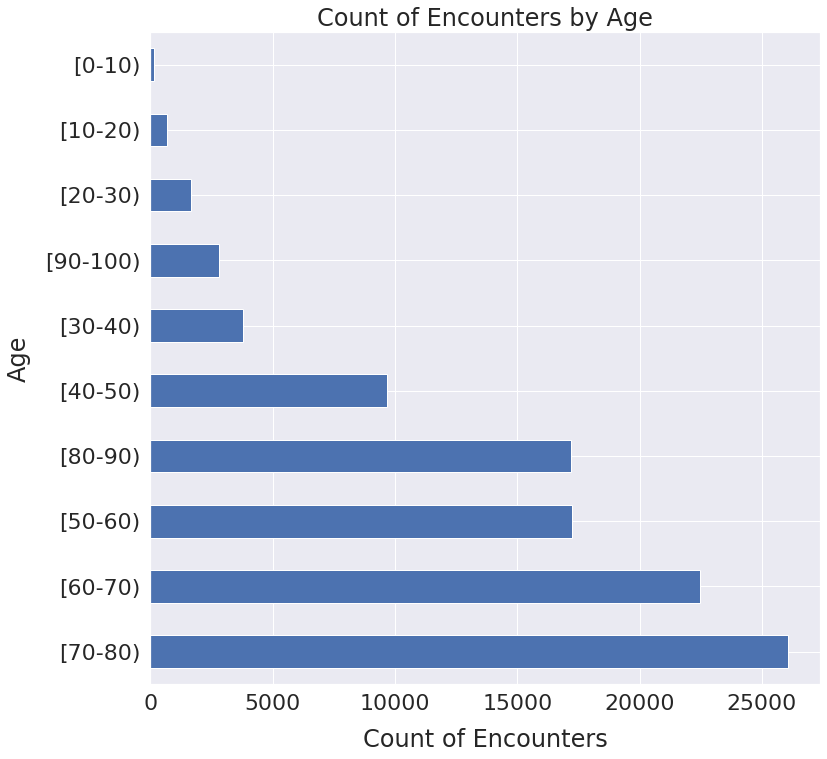

In [ ]:
sns.set(font_scale=2)
phd1['age'].value_counts().plot(x = 'diabetesMed', kind='barh', figsize=(12, 12))
plt.xlabel("Encounters", labelpad=14)
plt.ylabel("Age", labelpad=14)
plt.title("Encounters by Age")

In [ ]:
phd1['insulin'].unique()

array(['No', 'Up', 'Steady', 'Down'], dtype=object)

In [ ]:
ins50 = phd1[(phd1['age']=='[50-60)')]
ins50

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,insulin,diabetesMed,readmitted
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,0,0,414,411,250,9,None,Steady,Yes,>30
16,77076,92519352,AfricanAmerican,Male,[50-60),?,1,1,7,4,...,0,0,410,411,414,8,None,Steady,Yes,<30
17,84222,108662661,Caucasian,Female,[50-60),?,1,1,7,3,...,0,0,682,174,250,3,None,No,Yes,NO
20,150006,22864131,?,Female,[50-60),?,2,1,4,2,...,0,0,410,427,428,7,None,Down,Yes,NO
25,221634,21861756,Other,Female,[50-60),?,1,1,7,1,...,0,0,786,401,250,3,None,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101715,443226344,147936164,?,Male,[50-60),?,1,6,7,13,...,0,0,414,357,250.6,9,None,Down,Yes,NO
101717,443237984,182499863,Caucasian,Male,[50-60),?,1,3,7,9,...,0,0,518,410,491,9,Norm,Steady,Yes,NO
101720,443266892,180189752,Caucasian,Male,[50-60),?,2,1,7,5,...,0,0,584,276,276,9,>7,Down,Yes,>30
101731,443724206,124767527,Caucasian,Male,[50-60),?,1,1,7,4,...,0,0,250,276,276,7,None,Up,Yes,NO


The first question that comes to mind is how many people in the 50-60 age range are on insuling?

I end up using value count on ins50 to find out how many people are on insulin.

In [ ]:
ins50.value_counts('insulin')

insulin
No        7780
Steady    5382
Down      2255
Up        1839
dtype: int64

Ignore the No's 

In [ ]:
5382+2255+1839

9476

9476 is our total number of People on insulin.



In [ ]:
phd1 = phd1.drop(['admission_type_id',
                'discharge_disposition_id',
                'admission_source_id',
                'number_emergency',
                'number_inpatient'], axis=1)
phd1

,encounter_id,patient_nbr,race,gender,age,weight,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,num_medications,number_outpatient,diag_1,diag_2,diag_3,number_diagnoses,A1Cresult,insulin,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,1,?,Pediatrics-Endocrinology,41,...,1,0,250.83,?,?,1,None,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,3,?,?,59,...,18,0,276,250.01,255,9,None,Up,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,2,?,?,11,...,13,2,648,250,V27,6,None,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,2,?,?,44,...,16,0,8,250.43,403,7,None,Up,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,?,?,51,...,8,0,197,157,250,5,None,Steady,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,3,MC,?,51,...,16,0,250.13,291,458,9,>8,Down,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,5,MC,?,33,...,18,0,560,276,787,9,None,Steady,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,MC,?,53,...,9,1,38,590,296,13,None,Down,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,10,MC,Surgery-General,45,...,21,0,996,285,998,9,None,Up,Yes,NO


In [ ]:
phd2 = phd1.drop(['encounter_id',
'patient_nbr',
'weight',
'time_in_hospital',
'payer_code',
'medical_specialty',
'num_lab_procedures',
'num_procedures',
'num_medications',
'number_outpatient',
'diag_1',
'diag_2',
'diag_3',
'number_diagnoses',
'A1Cresult',
'readmitted'], axis = 1)

In [ ]:
phd2

,race,gender,age,insulin,diabetesMed
0,Caucasian,Female,[0-10),No,No
1,Caucasian,Female,[10-20),Up,Yes
2,AfricanAmerican,Female,[20-30),No,Yes
3,Caucasian,Male,[30-40),Up,Yes
4,Caucasian,Male,[40-50),Steady,Yes
...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),Down,Yes
101762,AfricanAmerican,Female,[80-90),Steady,Yes
101763,Caucasian,Male,[70-80),Down,Yes
101764,Caucasian,Female,[80-90),Up,Yes


I dropped some more data becuase I was trying to run some viz and my computer started to get overheated. Then I started to get 99.8% of points unable to be plotted. I tried to change my approach instead by trying to change age data to float to run some stats.

In [ ]:
phd2 = phd2.astype({'age':'float'})

ValueError: ignored

In [ ]:
sns.barplot(x= 'age', y='gender', hue ='insulin', data= phd2)

TypeError: ignored

So the next questions I wanted to explore are:

What percentage of people from the total DataSet were on insulin?

What trends were appearing with insulin use vs age and gender simultaneously?

Finally, is there a correlation between insuling use and race? 

